In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df =pd.read_csv("/content/Churn_Modelling.csv")
df.sample(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1067,1068,15599131,Dilke,650,Germany,Male,26,4,214346.96,2,1,0,128815.33,0
2884,2885,15776047,Nicholls,620,France,Female,29,3,0.00,2,0,1,153392.28,0
745,746,15640059,Smith,606,France,Male,40,5,0.00,2,1,1,70899.27,0
8274,8275,15669805,Warren,748,Germany,Female,31,1,99557.94,1,1,0,199255.32,0


In [8]:
df.drop('CustomerId', axis=1,inplace=True)

In [9]:
df.drop('RowNumber',axis=1,inplace=True)

In [10]:
df.drop('Surname',axis=1,inplace=True)

In [11]:
df.replace('Male',1,inplace=True)
df.replace('Female',0,inplace=True)

<ipython-input-11-1154271045>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('Female',0,inplace=True)


In [12]:
data= df['Geography']
enc=pd.get_dummies(data,columns=data)
enc=enc.astype(int)
print(enc)


      France  Germany  Spain
0          1        0      0
1          0        0      1
2          1        0      0
3          1        0      0
4          0        0      1
...      ...      ...    ...
9995       1        0      0
9996       1        0      0
9997       1        0      0
9998       0        1      0
9999       1        0      0

[10000 rows x 3 columns]


In [13]:
df = pd.concat([df,enc],axis=1)
df.drop('Geography',axis=1,inplace=True)
print(df)


      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       0   42       2       0.00              1          1   
1             608       0   41       1   83807.86              1          0   
2             502       0   42       8  159660.80              3          1   
3             699       0   39       1       0.00              2          0   
4             850       0   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       1   39       5       0.00              2          1   
9996          516       1   35      10   57369.61              1          1   
9997          709       0   36       7       0.00              1          0   
9998          772       1   42       3   75075.31              2          1   
9999          792       0   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Fran

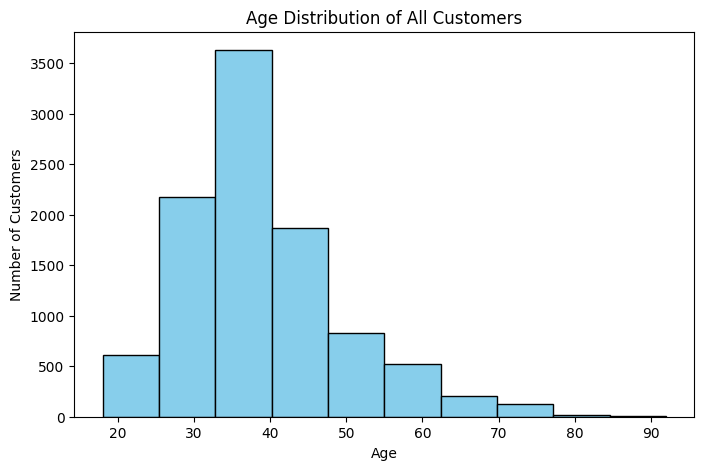

In [14]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Age Distribution of All Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()


Text(0.5, 1.0, 'Age dist Churned v/s Stayed ')

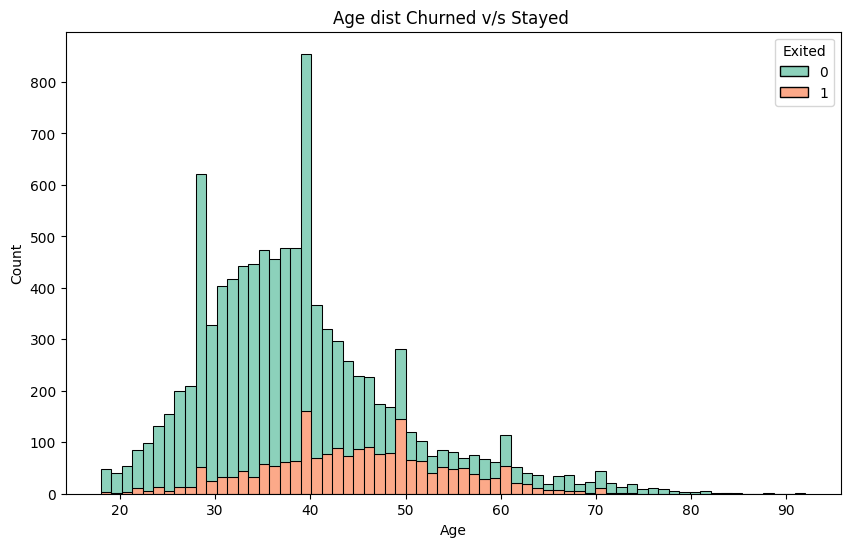

In [15]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Age',hue='Exited',multiple='stack',palette='Set2')
plt.title('Age dist Churned v/s Stayed ')


In [16]:
df['AgeProd']=df['Age'] * df['NumOfProducts']
df['CreditBal']=df['CreditScore']* df['Balance']


<Axes: xlabel='AgeProd', ylabel='Count'>

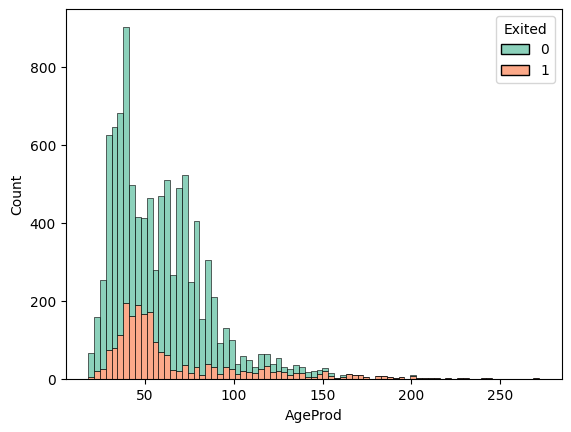

In [17]:
sns.histplot(data=df,x='AgeProd',hue='Exited',multiple='stack',palette='Set2')

<Axes: xlabel='CreditBal', ylabel='Count'>

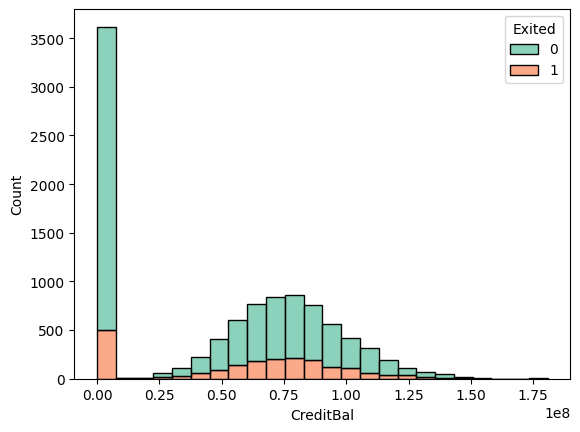

In [18]:
sns.histplot(data=df,x='CreditBal',hue='Exited',multiple='stack',palette='Set2')

<Axes: xlabel='LogCreditBal', ylabel='Count'>

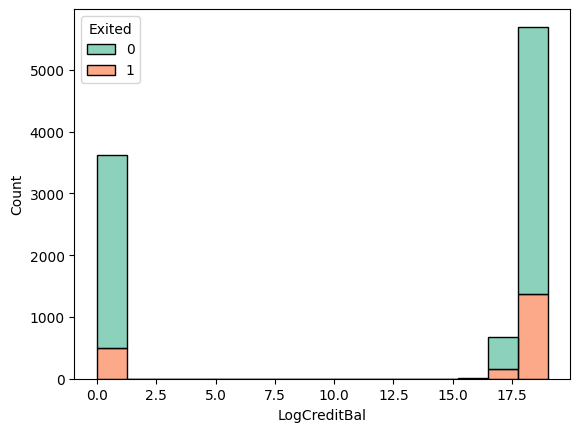

In [19]:
df['LogCreditBal'] = np.log1p(df['CreditBal'])  # log(1 + x) to handle zeros
sns.histplot(data=df, x='LogCreditBal', hue='Exited', multiple='stack', palette='Set2')


In [20]:
df.drop('CreditBal', axis=1, inplace=True)

<Axes: xlabel='CreditBalGroup', ylabel='count'>

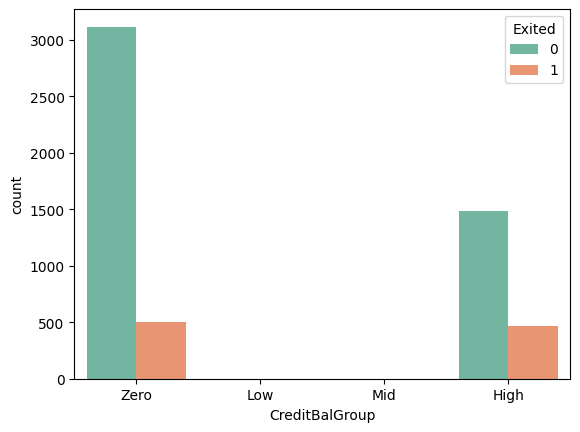

In [21]:
df['CreditBalGroup'] = pd.cut(df['LogCreditBal'], bins=[-0.1, 1, 10, 15, 18], labels=['Zero', 'Low', 'Mid', 'High'])
sns.countplot(data=df, x='CreditBalGroup', hue='Exited', palette='Set2')


In [22]:
df['High_inactive']=((df['Balance']>100000)& ( df['IsActiveMember']==0)).astype(int)

<Axes: xlabel='High_inactive', ylabel='count'>

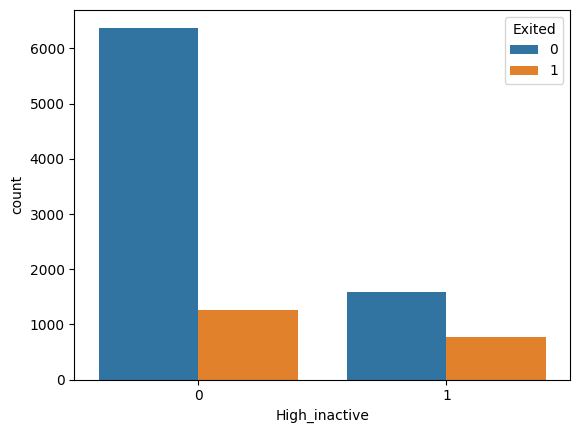

In [23]:
sns.countplot(data=df,x='High_inactive',hue='Exited')

In [24]:
df['low_inactive']=((df['Balance']<100000)& ( df['IsActiveMember']==0)).astype(int)

<Axes: xlabel='low_inactive', ylabel='count'>

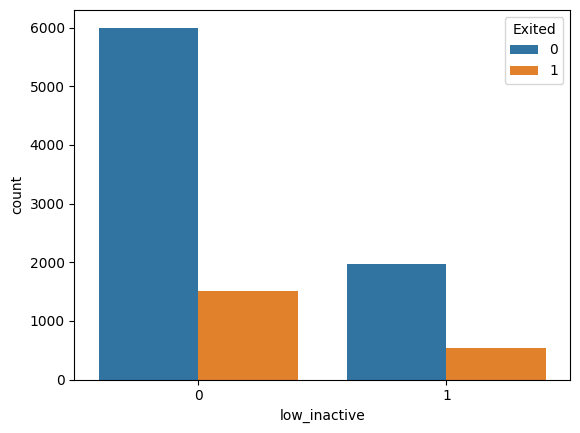

In [25]:
sns.countplot(data=df,x='low_inactive',hue='Exited')

In [26]:
df['Young_Manyprd']= ((df['Age']<30) & (df['NumOfProducts']>=3)).astype(int)
df['Old_Manyprd']= ((df['Age']>30) & (df['NumOfProducts']>=3)).astype(int)

In [27]:
df.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,AgeProd,LogCreditBal,CreditBalGroup,High_inactive,low_inactive,Young_Manyprd,Old_Manyprd
4354,558,1,45,4,0.00,1,1,0,131807.14,0,0,0,1,45,0.000000,Zero,0,1,0,0
7485,561,1,32,5,0.00,2,1,0,84871.99,0,1,0,0,64,0.000000,Zero,0,1,0,0
475,621,1,46,6,141078.37,1,0,0,34580.80,1,0,1,0,46,18.288402,NaN,1,0,0,0


In [28]:
df.isna().sum()

,0
CreditScore,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0


In [29]:
df['AgeGrp'] = pd.cut(df['Age'],
                      bins=[0, 30, 40, 50, 60, 100],
                      labels=['18–30', '31–40', '41–50', '51–60', '61+'],
                      right=True)


In [30]:
def categorize_credit(logval):
    if logval == 0:
        return 'Zero'
    elif logval < 12:
        return 'Low'
    elif logval < 16:
        return 'Mid'
    else:
        return 'High'

df['CreditBalGroup'] = df['LogCreditBal'].apply(categorize_credit)


In [31]:
df.isna().sum()

,0
CreditScore,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0


In [32]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Germany,Spain,AgeProd,LogCreditBal,CreditBalGroup,High_inactive,low_inactive,Young_Manyprd,Old_Manyprd,AgeGrp
8742,693,0,45,4,0.00,2,1,1,26589.56,0,...,0,1,90,0.000000,Zero,0,0,0,0,41–50
1359,431,1,37,0,120764.08,1,1,1,117023.08,0,...,0,0,37,17.767702,High,0,0,0,0,31–40
7718,740,0,60,5,108028.08,2,0,0,25980.42,1,...,0,0,120,18.196797,High,1,0,0,0,51–60
6602,761,0,38,1,120530.13,2,1,0,109394.62,0,...,1,0,76,18.334288,High,1,0,0,0,31–40
3817,682,0,29,6,101012.77,1,0,0,32589.89,1,...,1,0,29,18.048032,High,1,0,0,0,18–30


In [33]:
df['Tenure_bal']=df['Tenure'] * df['Balance']

In [34]:
df.groupby('Exited')['Tenure_bal'].mean()

,Tenure_bal
Exited,
0,362462.70640
1,454434.16377


<ipython-input-35-3445599092>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Exited', y='Log_TenureBalance', data=df, multiple='stack', palette='Set2')


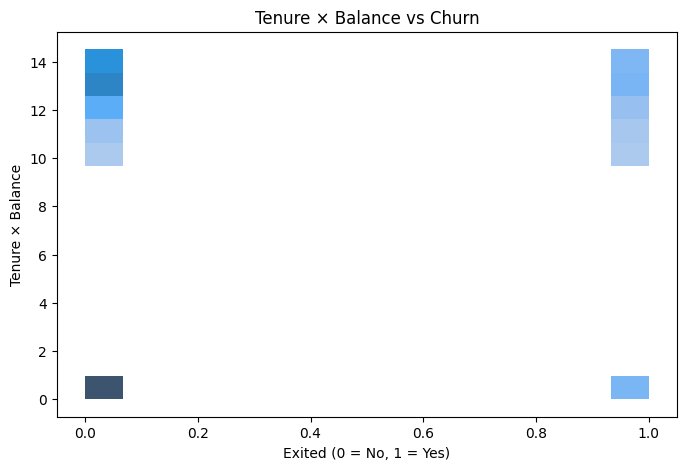

In [35]:

df['Log_TenureBalance'] = np.log1p(df['Tenure_bal'])

plt.figure(figsize=(8, 5))
sns.histplot(x='Exited', y='Log_TenureBalance', data=df, multiple='stack', palette='Set2')
plt.title('Tenure × Balance vs Churn')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Tenure × Balance')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

features = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
    'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
    'AgeProd', 'LogCreditBal', 'High_inactive', 'low_inactive',
    'Young_Manyprd', 'Old_Manyprd', 'France', 'Germany', 'Spain'
]

X = df[features]
y = df['Exited']



X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [57]:
def ANN( X_train_scaled,Y_train, X_test_scaled, Y_test , loss, weights):

  model=keras.Sequential([
      keras.layers.Dense(28,input_dim=len(X_train.columns), activation='relu'),
      keras.layers.Dropout(0.1),
      keras.layers.Dense(16,activation='relu'),
      keras.layers.Dropout(0.1),
      keras.layers.Dense(1,activation='sigmoid')
                         ])
  model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])

  if weights==-1:
    model.fit(X_train_scaled,Y_train,epochs=300)
  else:
        model.fit(X_train_scaled,Y_train,epochs=300,class_weight = weights)
  print(model.evaluate(X_test_scaled,Y_test))

  y_pred= model.predict(X_test_scaled)
  y_pred=np.round(y_pred)


  print("Classification report :\n " , classification_report(Y_test,y_pred))
  print("Confusion Matrix : \n", confusion_matrix(Y_test,y_pred))
  return y_pred









In [88]:
# SMOTE


In [58]:
X= df[features]
y=df['Exited']


In [59]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
y_train.value_counts()

,count
Exited,
0,6370
1,6370


In [61]:
y_preds = ANN(X_train_scaled,y_train,X_test_scaled,y_test,'binary_crossentropy',-1)

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7095 - loss: 0.5656
Epoch 2/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8466 - loss: 0.3541
Epoch 3/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8647 - loss: 0.3088
Epoch 4/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8671 - loss: 0.3064
Epoch 5/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8753 - loss: 0.2912
Epoch 6/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8767 - loss: 0.2914
Epoch 7/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8860 - loss: 0.2816
Epoch 8/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8788 - loss: 0.2804
Epoch 9/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8793 - loss: 0.2826
Epoch 10/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8805 - loss: 0.2797
Epoch 11/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8831 - loss: 0.2740
Epoch 12/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step